In [7]:
# example_grids.ipynb – Execution notebook
# Author: Marco Napoleone – 2025

from choromorph import choromorph
from grids import build_square_grid, build_circle_grid
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection



In [8]:
# Square grid test
n_side = 20
grid, edges = build_square_grid(n_side)
pois = np.array([
    [0.80, 0.20],
    [0.75, 0.75],
    [0.20, 0.65],
    [0.60, 0.60]
])

morphed, n_iter = choromorph(
    grid, pois, edges,
    alpha=0.005,
    beta=0.1,
    threshold=1e-3,
    max_iter=250,
    max_step=0.05,
)
print(f"Converged in {n_iter} iterations")



Converged in 250 iterations


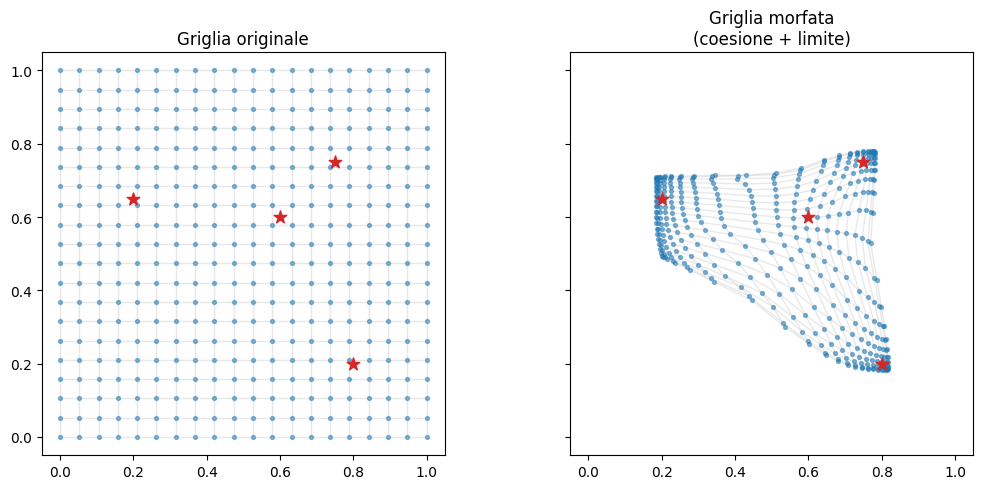

In [9]:
# Visualize square grid
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)

def draw(ax, nodes: np.ndarray, title: str) -> None:
    seg = nodes[edges]
    ax.add_collection(LineCollection(seg, colors='lightgray', linewidths=1, alpha=0.5))
    ax.scatter(nodes[:, 0], nodes[:, 1], s=8, color='tab:blue', zorder=2, alpha=0.5, label='Nodes')
    ax.scatter(pois[:, 0], pois[:, 1], s=90, marker='*', color='tab:red', zorder=3, label='POIs')
    ax.set_aspect('equal')
    ax.set_title(title)

draw(axs[0], grid, "Griglia originale")
draw(axs[1], morphed, "Griglia morfata\n(coesione + limite)")
plt.tight_layout()
plt.show()



In [10]:
# Circle grid test
n_nodes = 24
grid, edges = build_circle_grid(n_nodes)
pois = np.array([
    [0.40, 0.10],
    [-0.35, -0.35],
    [0.10, 0.25],
    [0.30, 0.30]
])

morphed, n_iter = choromorph(
    grid, pois, edges,
    alpha=0.01,
    beta=0.1,
    threshold=1e-3,
    max_iter=50,
    max_step=0.05,
)
print(f"Converged in {n_iter} iterations")



Converged in 50 iterations


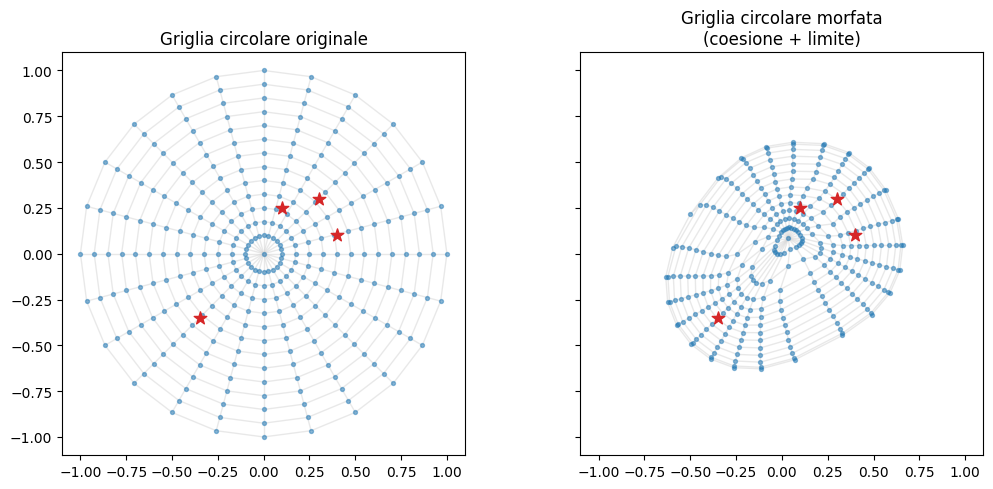

In [11]:
# Visualize circle grid
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)
draw(axs[0], grid, "Griglia circolare originale")
draw(axs[1], morphed, "Griglia circolare morfata\n(coesione + limite)")
plt.tight_layout()
plt.show()
